In [1]:
import random, datetime
from pathlib import Path

from ultralytics import YOLO
from ultralytics.yolo.engine.results import Results
from ultralytics.yolo.utils import set_settings, DATASETS_DIR

import utils

### 学習に利用するデータセットを確認

(428, 320)
(428, 320)
(959, 640)
(600, 400)
(433, 320)


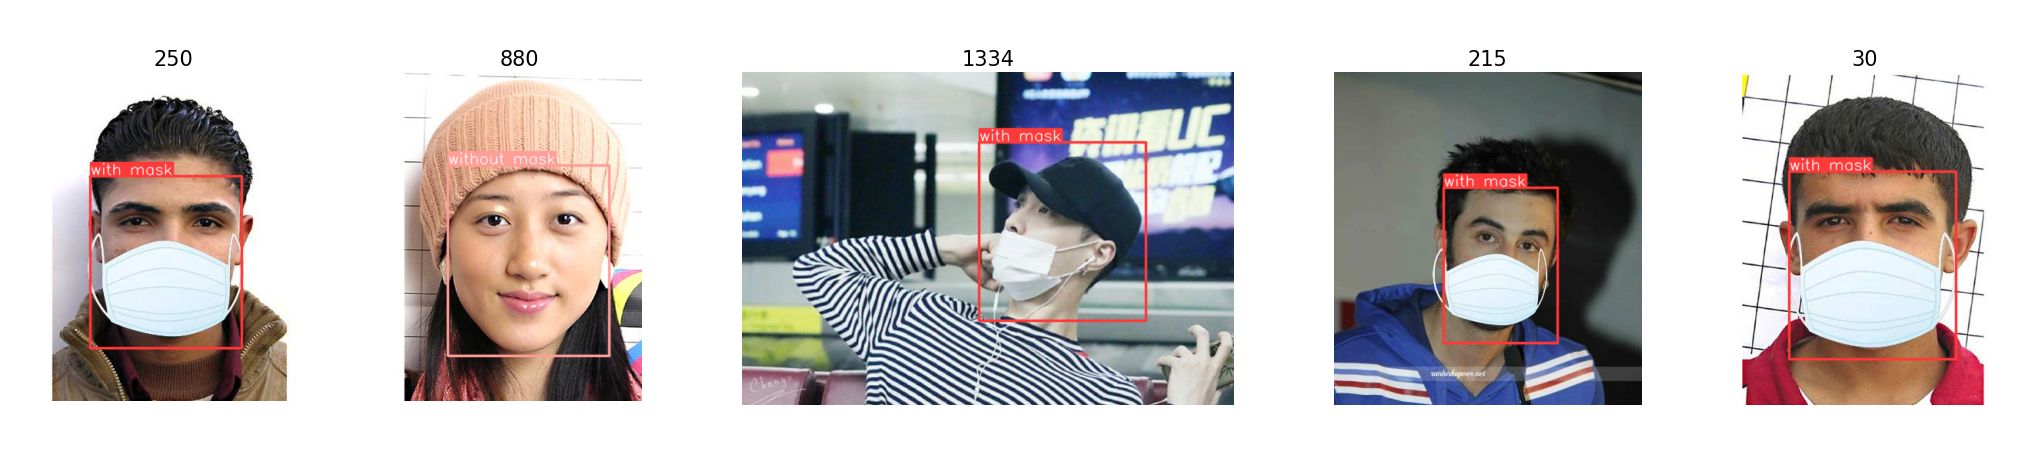

In [2]:
config_path = Path("./dataset/mask_yolo_dataset/config.yaml")

if config_path.suffix != ".yaml":
    raise "not yaml"

yolo_data_train = utils.YOLO_dataset(str(config_path), "train")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        masks     = yolo_data["masks"],
        keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)

### YOLOライブラリにデータセットの場所を登録

In [3]:
set_settings({"datasets_dir": str(config_path.parent.parent.resolve())})

print(DATASETS_DIR)

/home/dnn20/hirahara/2023_sentan_B/20230713_yolov8_train/dataset


### 学習

In [4]:
dt_now = datetime.datetime.now().strftime('%Y%m%d-%H%M')

yolo_model_path = Path("./models/yolov8n.pt")
model = YOLO(str(yolo_model_path))

seed = -1
if seed < 0:
    seed = random.randint(1, 10000000)

print(Path(DATASETS_DIR).exists())

model.train(
                data    = str(config_path), 
                epochs  = 200,
                patience = 0,
                name    = f"{dt_now}_{yolo_model_path.stem}_{config_path.parent.name}",
                project = "./output/yolov8/",
                seed    = seed
            )


New https://pypi.org/project/ultralytics/8.0.133 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.125 🚀 Python-3.9.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24251MiB)
yolo/engine/trainer: task=detect, mode=train, model=models/yolov8n.pt, data=dataset/mask_yolo_dataset/config.yaml, epochs=200, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./output/yolov8/, name=20230713-1206_yolov8n_mask_yolo_dataset, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=6519789, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride

True


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [ ]:
model.export(format='onnx')